1. [COSF](#przesuniecie)

In [1]:
import btk
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
from ezc3d import c3d
from pyomeca import Markers, Analogs
from matplotlib.pyplot import subplot

In [68]:
import dataprocesing as dp

datapath_fullmove = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-06-B0445-S01-E02-T05.c3d"
datapath_fullmove=r"Z:\Miecz\B0452\2020-08-12-B0452-S01\2020-08-12-B0452-S01-E04-T02.c3d"
#datapath_fullmove=r"Z:\Miecz\B0444\2020-08-05-B0444-S01\2020-08-05-B0444-S01-E03-T02.c3d"

datapath_singlemove = r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K1.c3d"
folder_path=r"Z:\Miecz\\"

In [69]:
emg_data = dp.read_analog_allmuscles(datapath_fullmove)
emg_renamed = dp.rename_emg(emg_data)
normalised_emg=dp.normalize_emg(emg_renamed)

[3340, 5525, 7590, 9530, 11720, 13905, 15700, 17940, 19955, 21945] [5525, 7590, 9530, 11720, 13905, 15700, 17940, 19955, 21945, 24010]


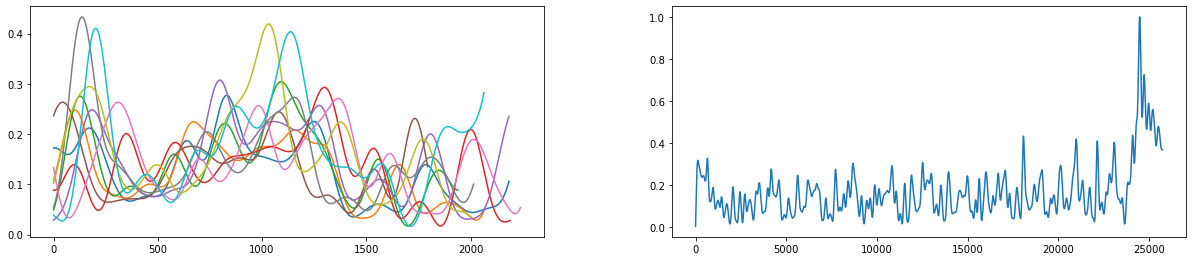

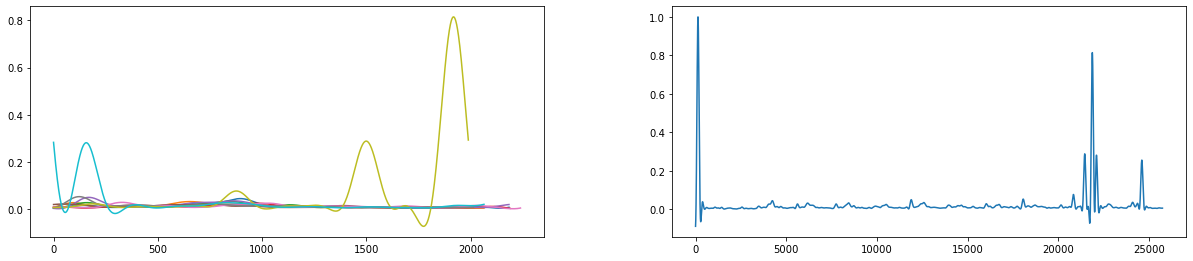

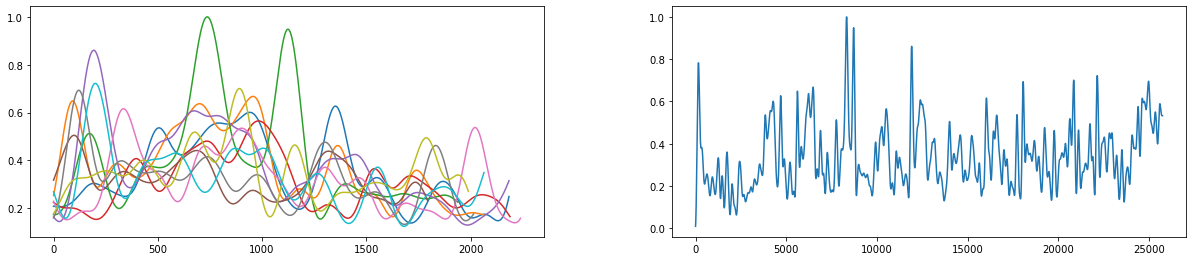

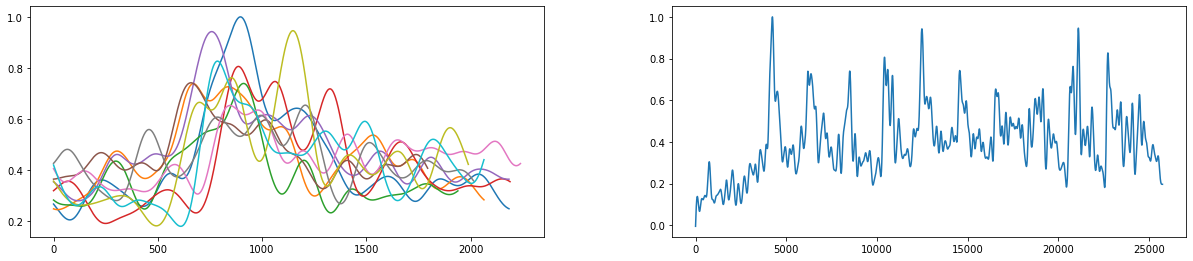

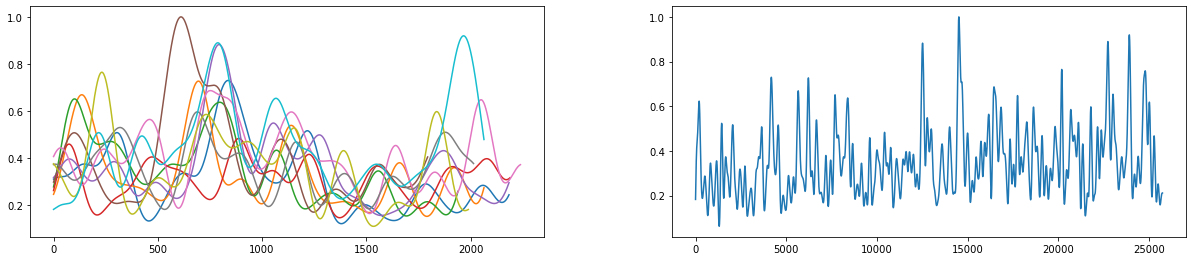

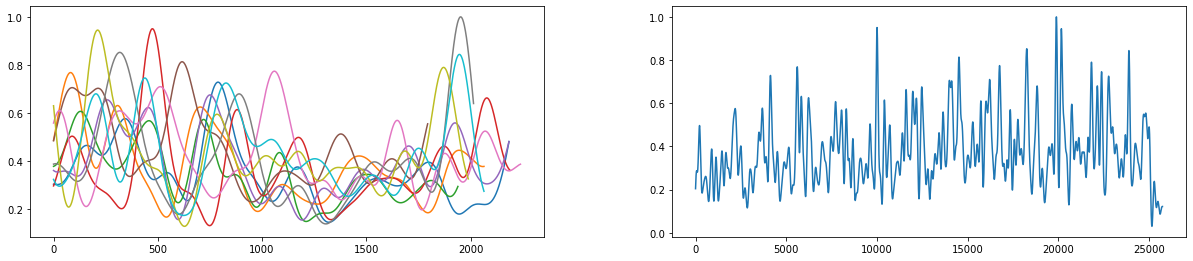

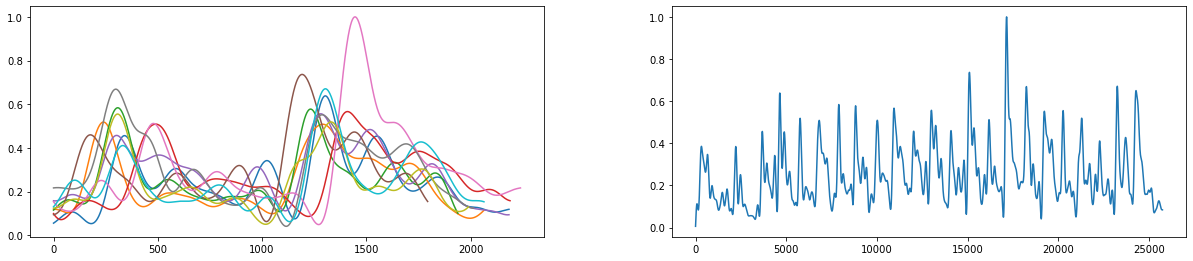

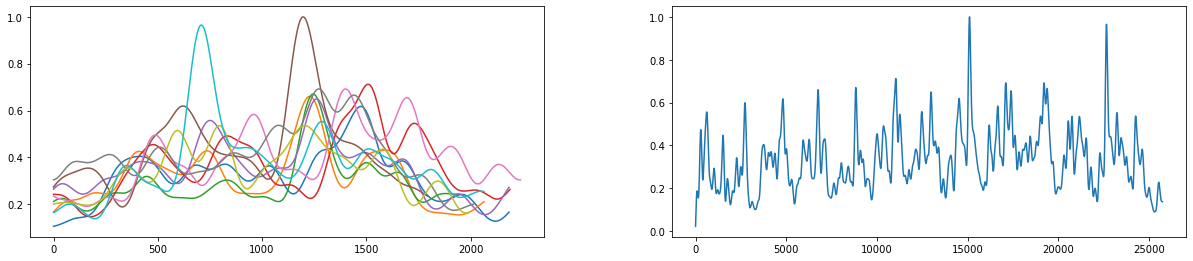

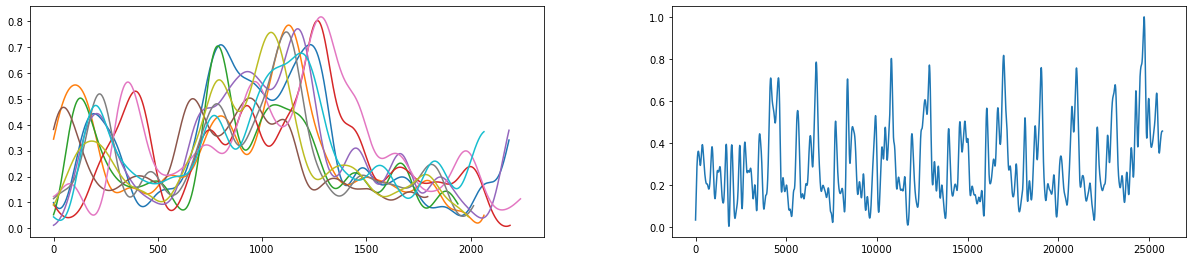

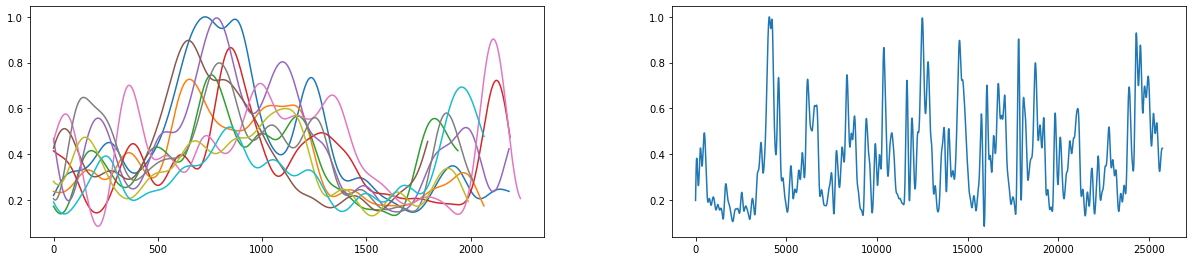

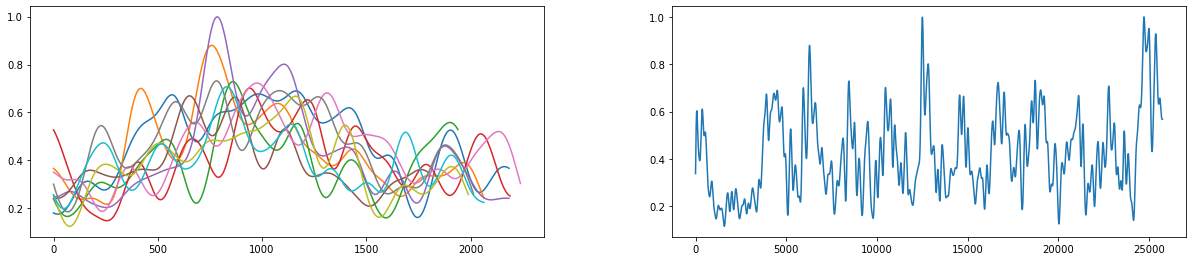

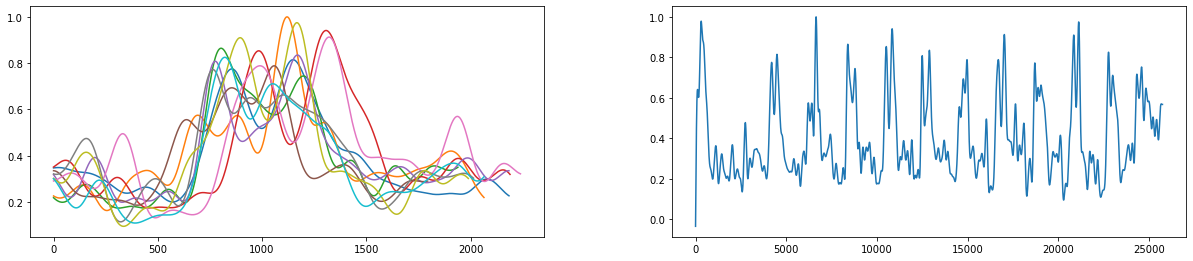

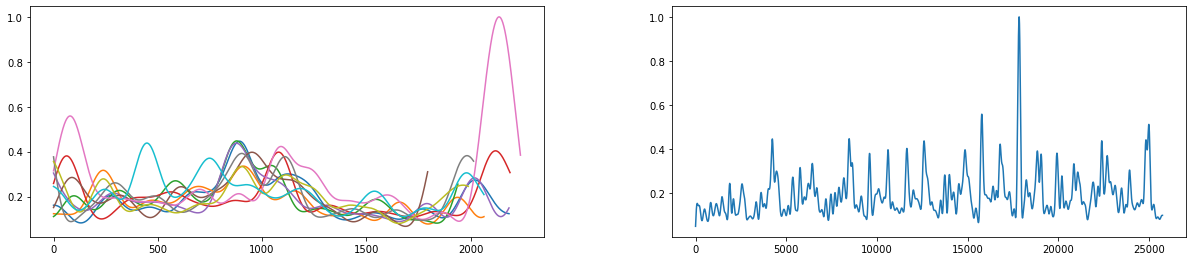

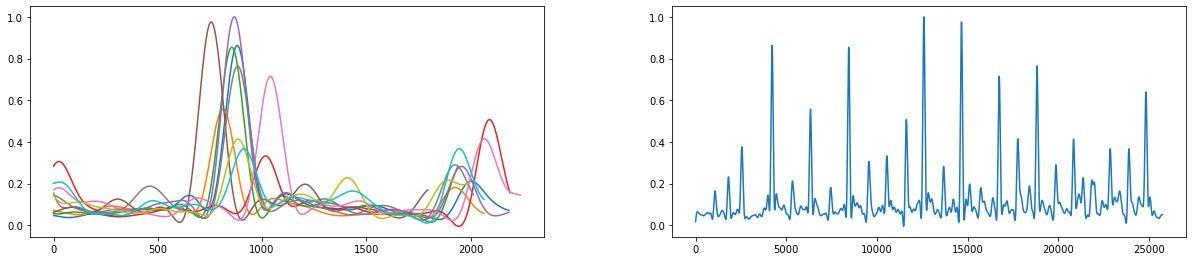

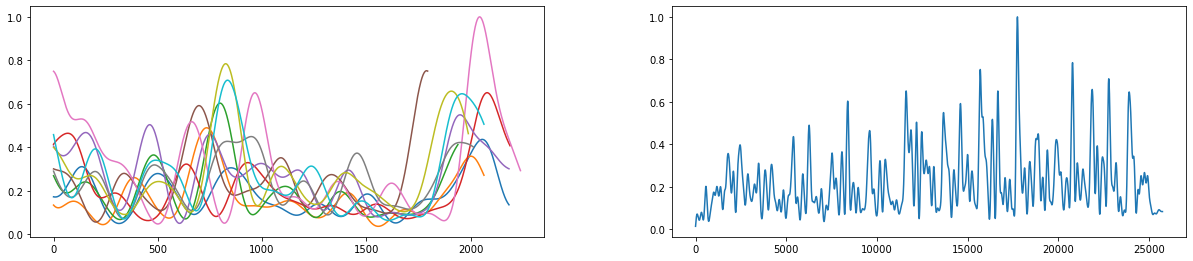

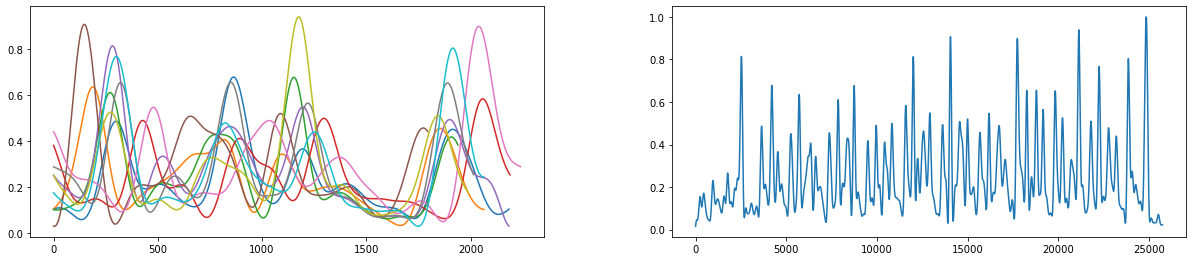

In [70]:
dp.show_events(datapath_fullmove)

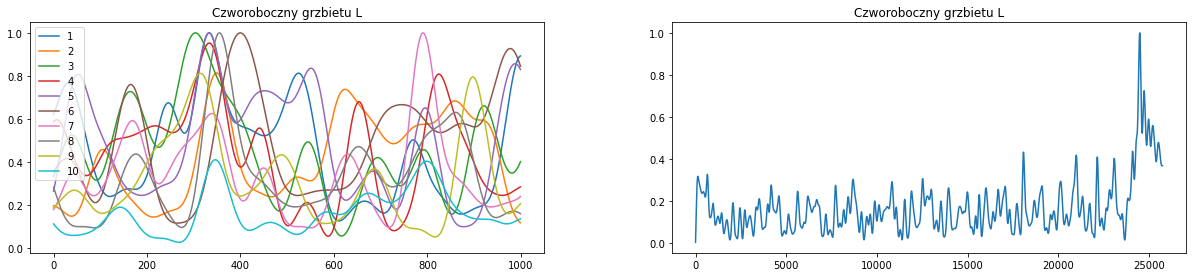

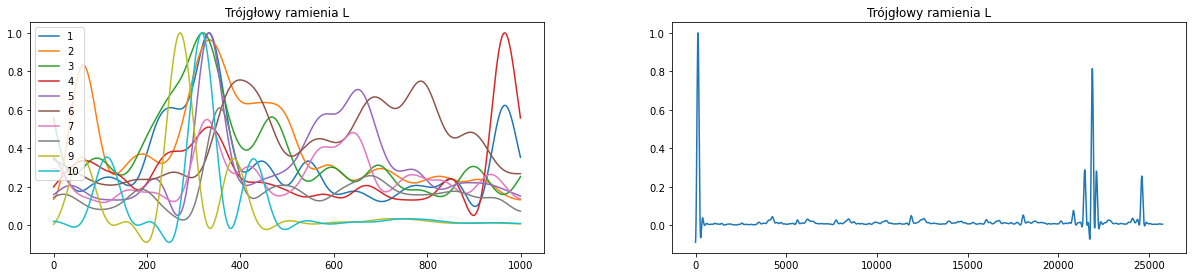

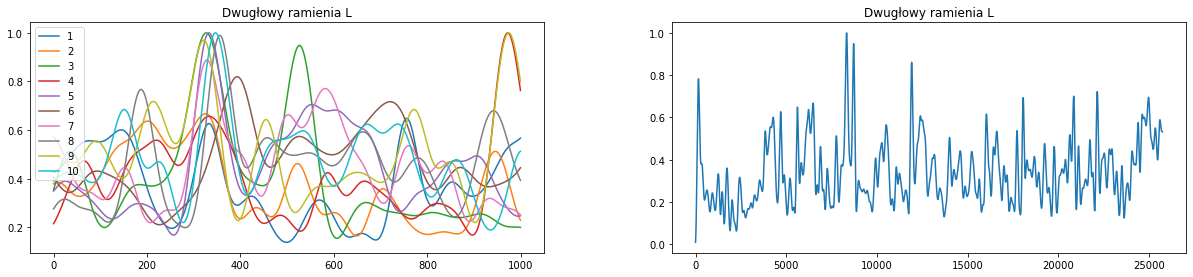

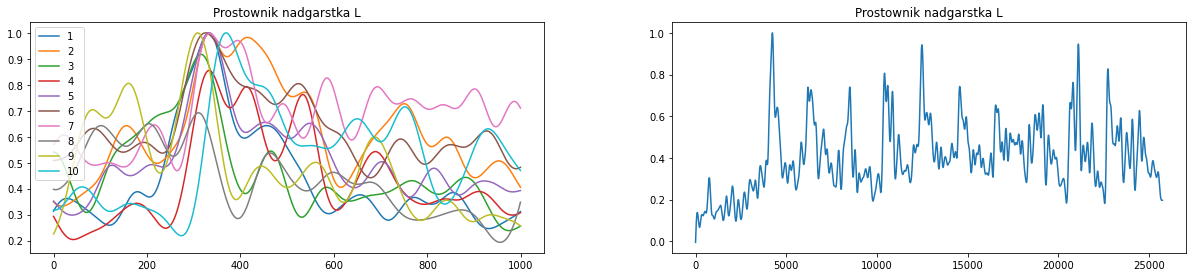

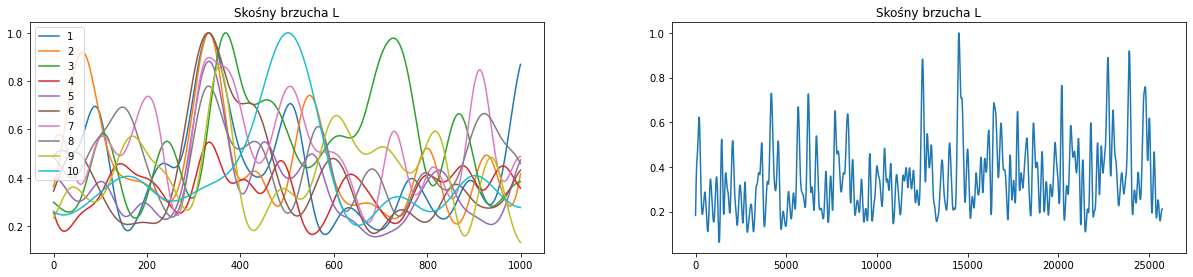

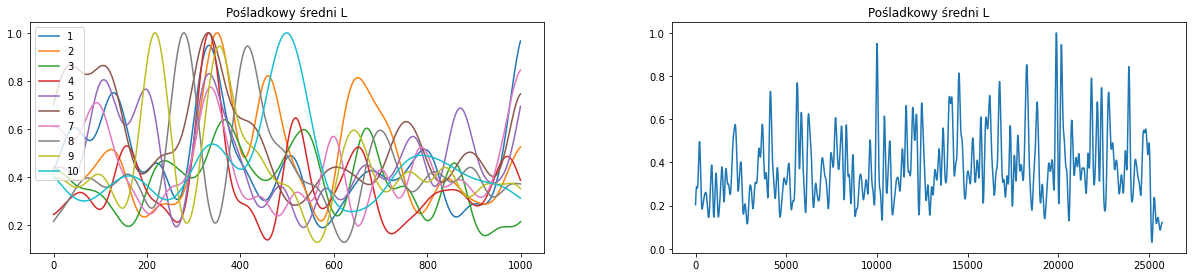

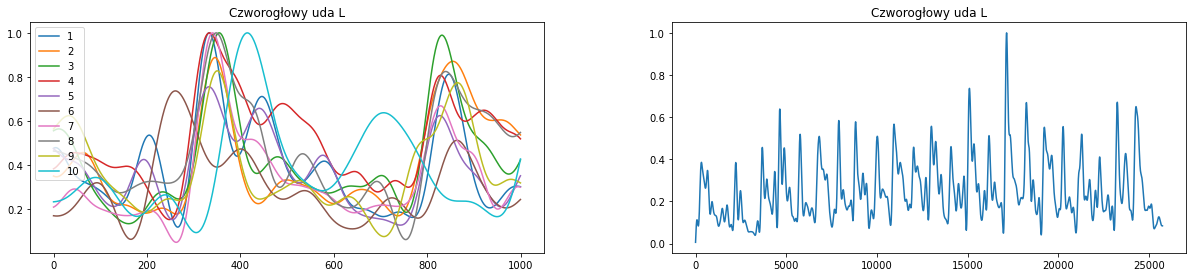

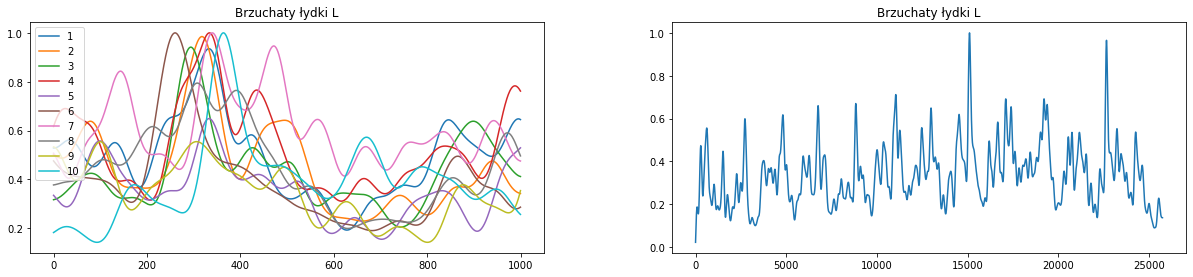

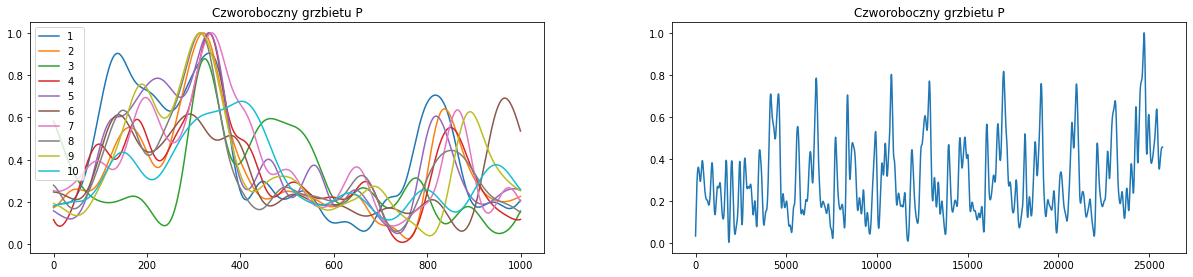

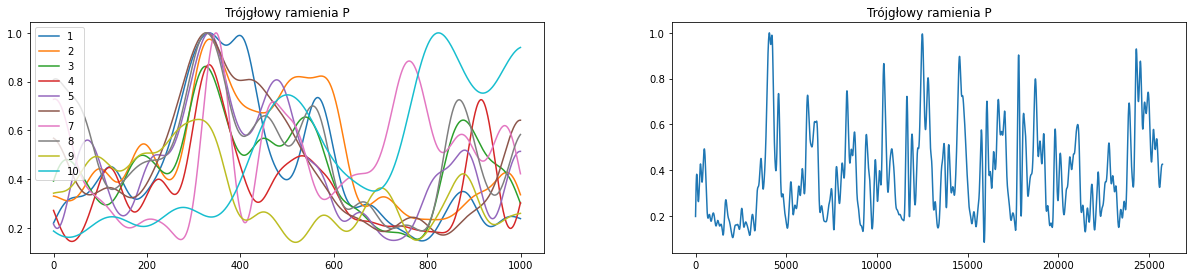

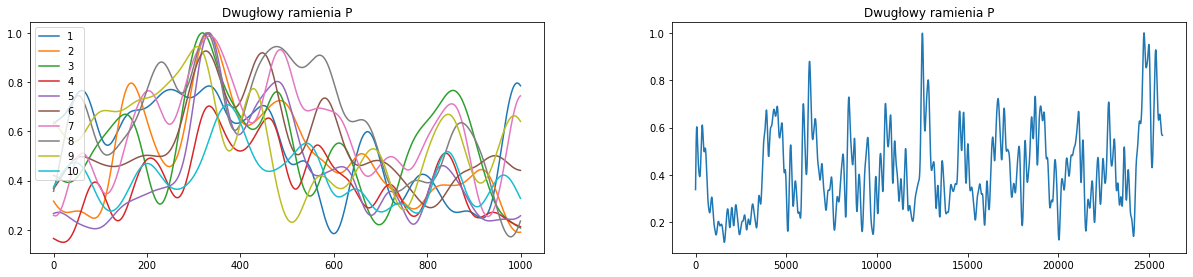

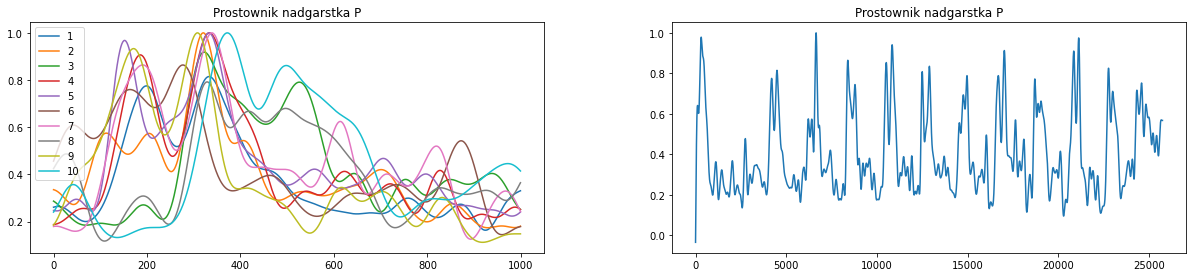

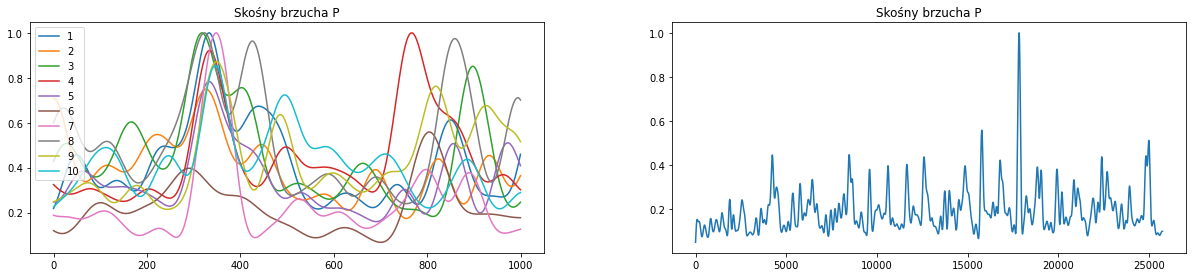

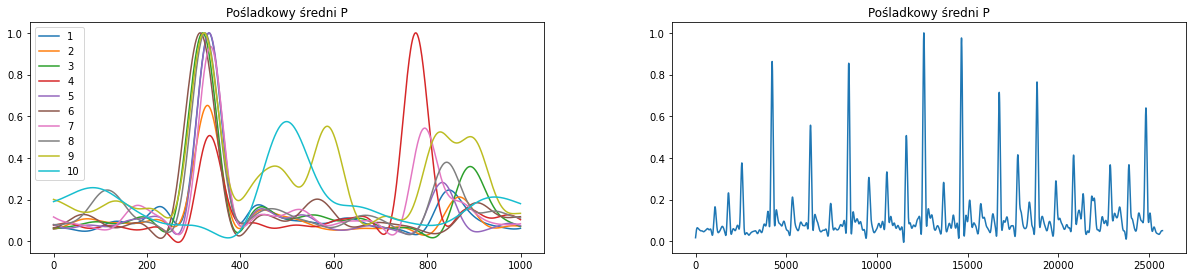

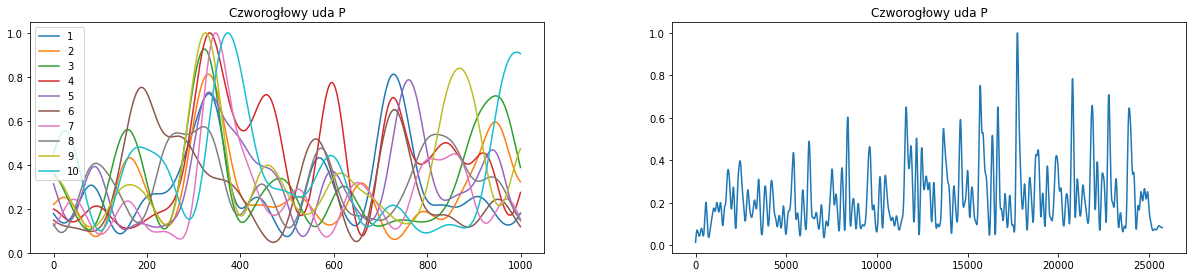

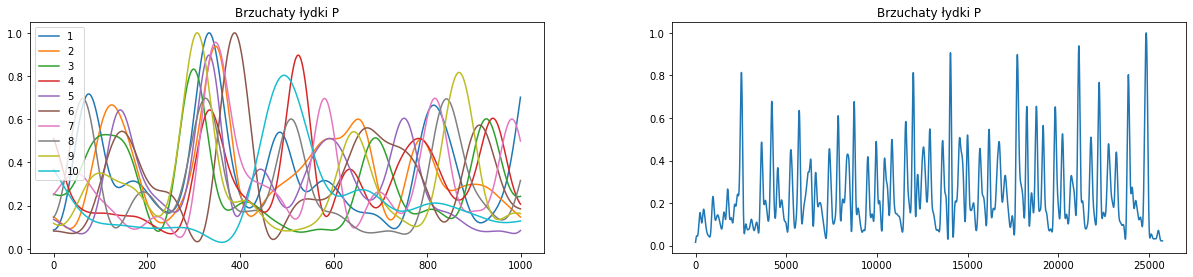

In [71]:
dp.show_events_norm_shifted(datapath_fullmove)

### cos <a name="przesuniecie"></a>

In [72]:
def find_max_frame(p,d,analogs):
    
    val_arr=[]
    for frame in range(len(analogs)):
        val_arr.append(analogs[frame].values)
    max_val=max(val_arr)
#     print(max_val)
#     print(val_arr.index(max_val))
#     print(len(analogs))
    frame_size=len(analogs)
    
    
    return [val_arr.index(max_val),frame_size]

In [73]:
def find_new_start(p,d,analogs,max_frame,frame_size,event_num):

    val_arr=[]
    analogs=analogs[p:d]
    #print(len(analogs))
    analogs=analogs.meca.time_normalize(n_frames=frame_size) #usunac przy tworzeniu bazy!
    
    for frame in range(len(analogs)):
        val_arr.append(analogs[frame].values)
    max_val=max(val_arr)
    this_max_frame=val_arr.index(max_val)
    #print(len(analogs))
    #dif=this_max_frame-p
    
    #s=p+(max_frame-this_max_frame)
    #k=d+(max_frame-this_max_frame) 
    s=p+(this_max_frame-p-max_frame)
    k=d+(this_max_frame-p-max_frame) 
    
    print(s,k)
    return [s,k]

In [74]:
def show_events_norm_shifted(data_path):
    """
    Funkcja wyświetlająca prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.

    Input:
    - data_path - ścieżka dostępu do pliku c3d

    Output:
    - Wykresy przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie

    """
    emg_processed = dp.emg_full_preproces(data_path)

    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    p,d=dp.read_labels(data_path, 1000)
    max_frame, frame_size=find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
    for num in range(16):
        
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

        for i in range(len(p)): 
                       
            
            s,k=find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
            
            
            emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
            )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)
#             if i==9:
#                 time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=(int)(1000*(len(emg_processed[9][p[9]:d[9]])/k)))
#             else:
#                 time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
            time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
            plt.plot(time_normalized, label=i+1)     
            plt.title(muscles_names[num])
            plt.legend(loc='upper left')

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names[num])
        plt.show()

103 2288
-617 1448
502 2442
569 2759
70 2255
-674 1121
605 2845
-579 1436
406 2396
-513 1552


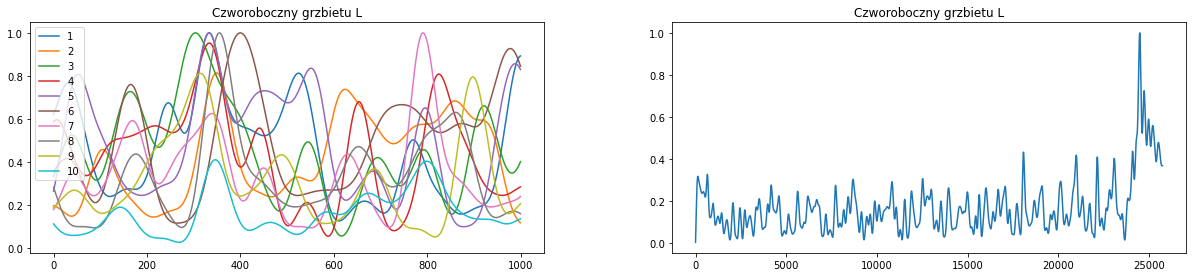

169 2354
-36 2029
226 2166
245 2435
-558 1627
-667 1128
-407 1833
-594 1421
1379 3369
-727 1338


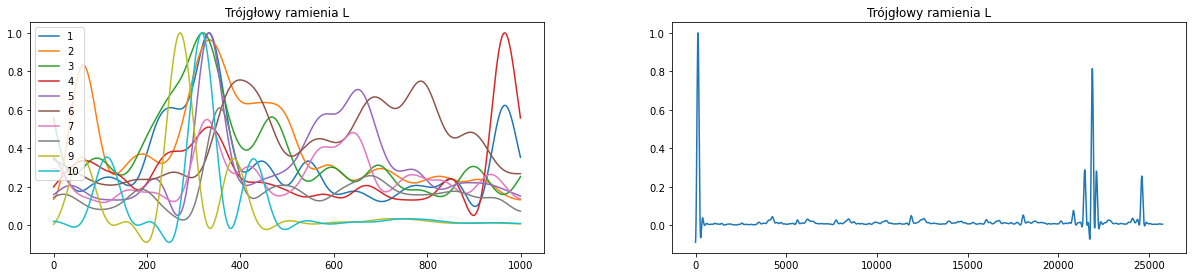

625 2810
285 2350
103 2043
254 2444
-534 1651
-607 1188
-400 1840
-596 1419
252 2242
-515 1550


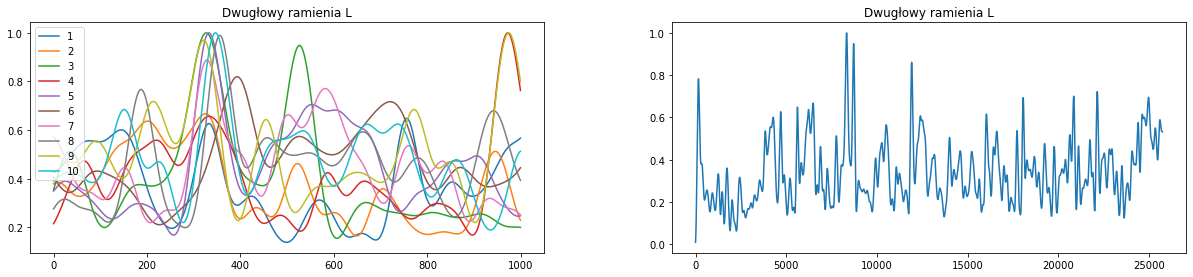

169 2354
-18 2047
299 2239
157 2347
31 2216
75 1870
98 2338
582 2597
534 2524
105 2170


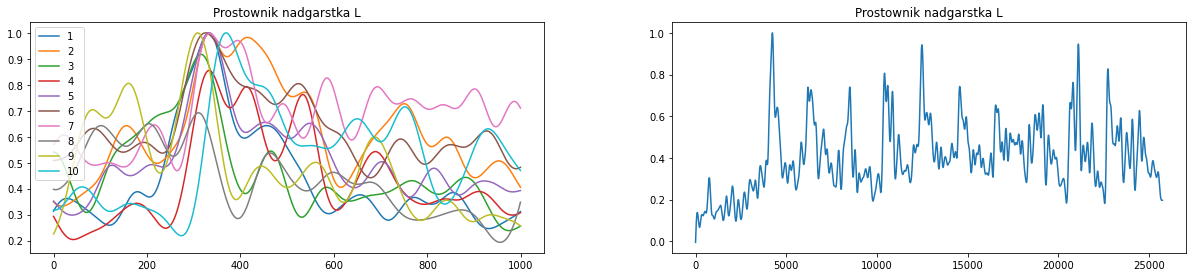

110 2295
8 2073
-614 1326
159 2349
67 2252
17 1812
7 2247
21 2036
-473 1517
1354 3419


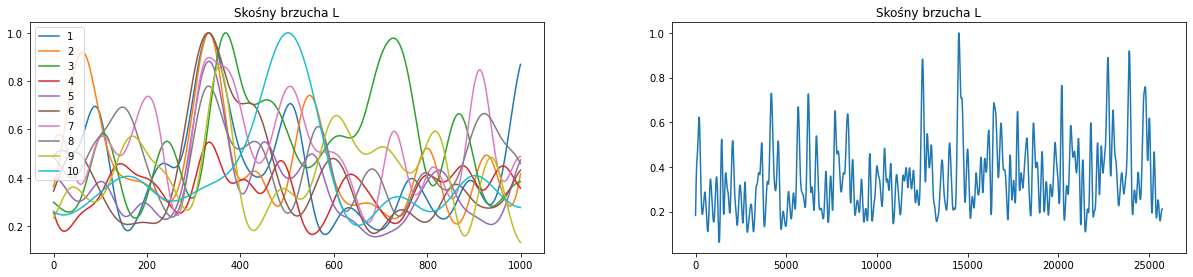

62 2247
-641 1424
-581 1359
-254 1936
23 2208
23 1818
306 2546
1390 3405
-495 1495
1332 3397


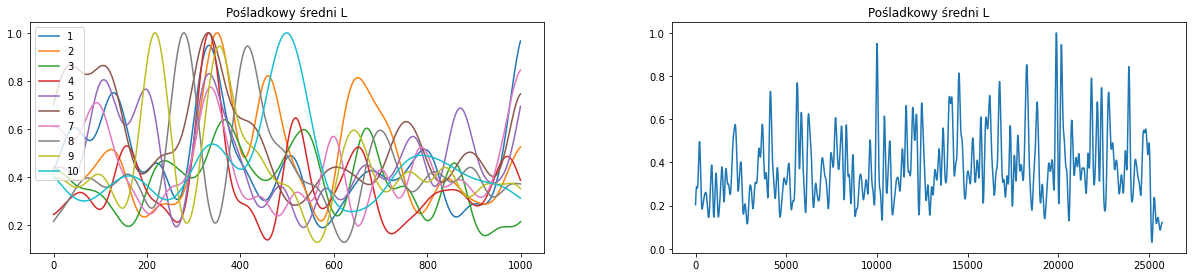

576 2761
-474 1591
-380 1560
679 2869
555 2740
724 2519
683 2923
-403 1612
-390 1600
652 2717


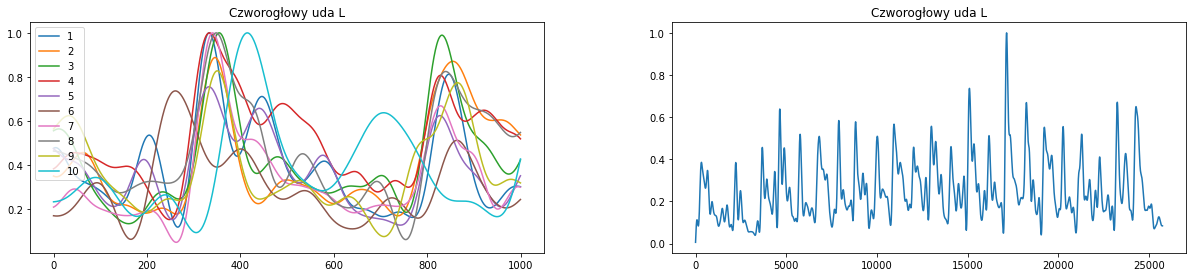

747 2932
573 2638
675 2615
778 2968
534 2719
730 2525
639 2879
652 2667
596 2586
23 2088


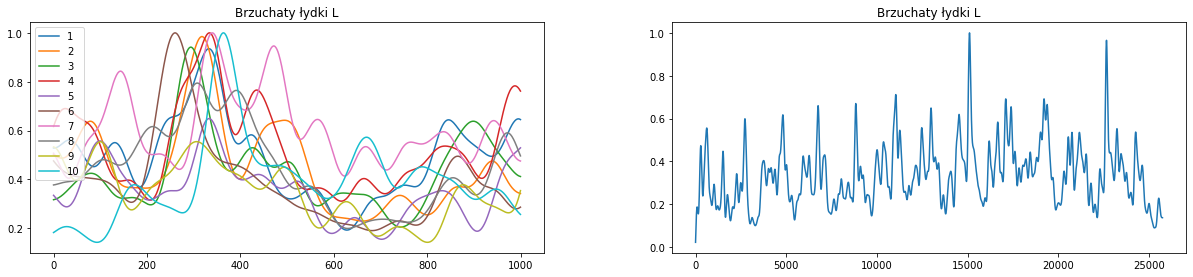

503 2688
466 2531
160 2100
536 2726
444 2629
418 2213
524 2764
483 2498
418 2408
529 2594


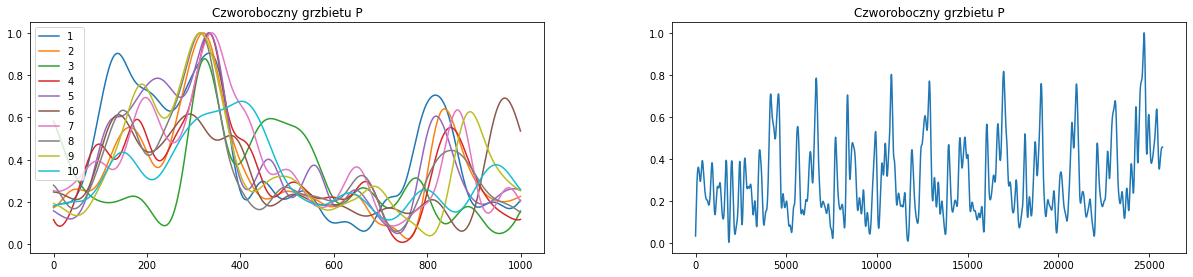

0 2185
-37 2028
126 2066
120 2310
55 2240
60 1855
1330 3570
135 2150
496 2486
1344 3409


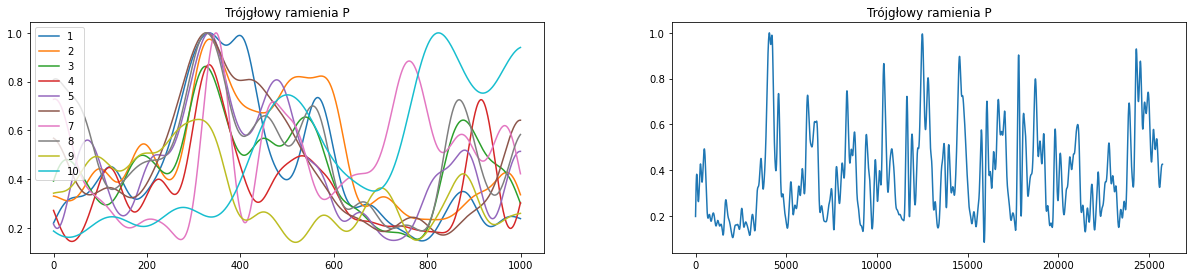

435 2620
75 2140
242 2182
211 2401
58 2243
67 1862
225 2465
121 2136
547 2537
153 2218


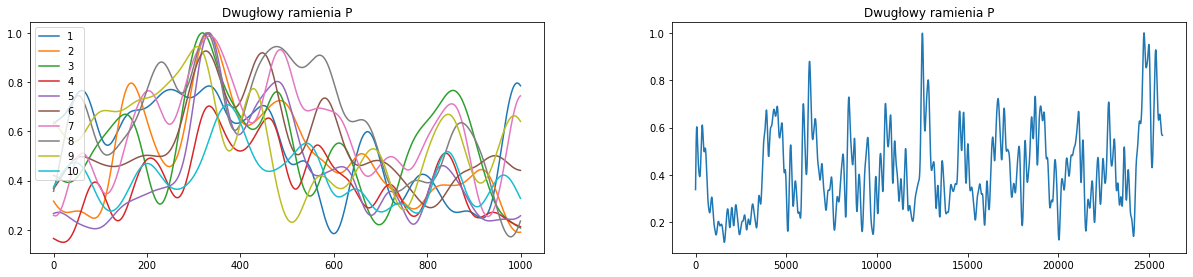

421 2606
458 2523
178 2118
577 2767
443 2628
561 2356
562 2802
102 2117
554 2544
142 2207


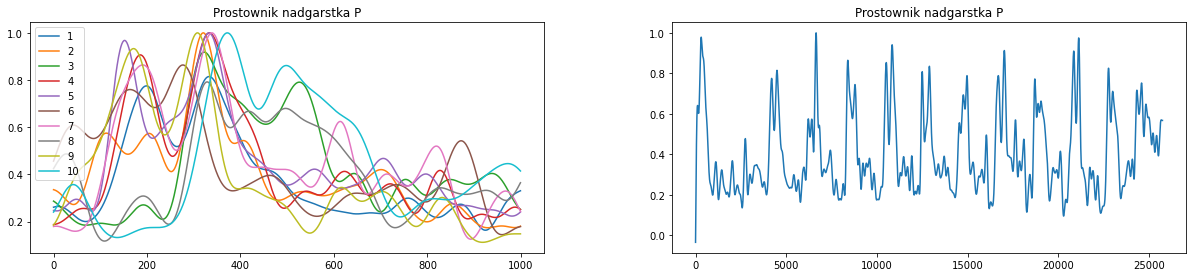

165 2350
237 2302
262 2202
1388 3578
149 2334
431 2226
1357 3597
252 2267
-727 1263
-253 1812


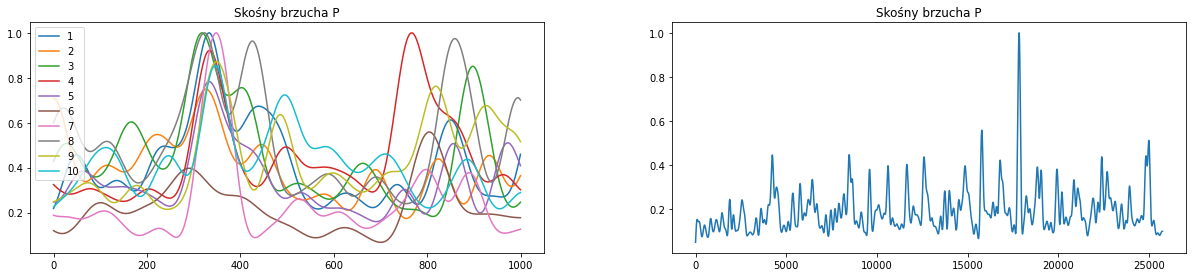

154 2339
132 2197
236 2176
1359 3549
139 2324
193 1988
287 2527
230 2245
244 2234
1331 3396


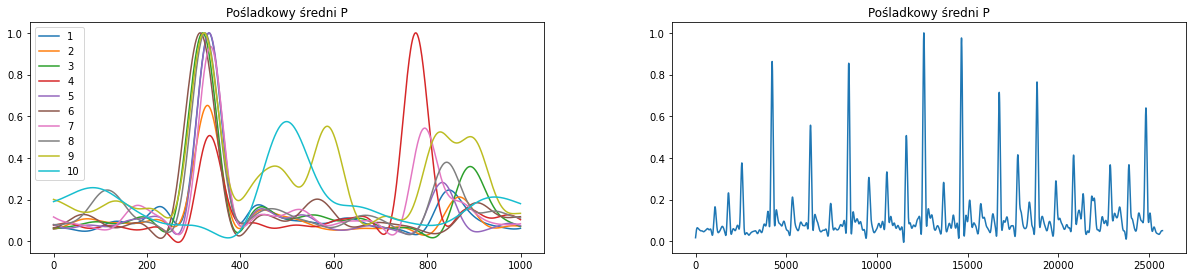

1329 3514
50 2115
172 2112
1347 3537
1222 3407
1451 3246
1266 3506
301 2316
179 2169
156 2221


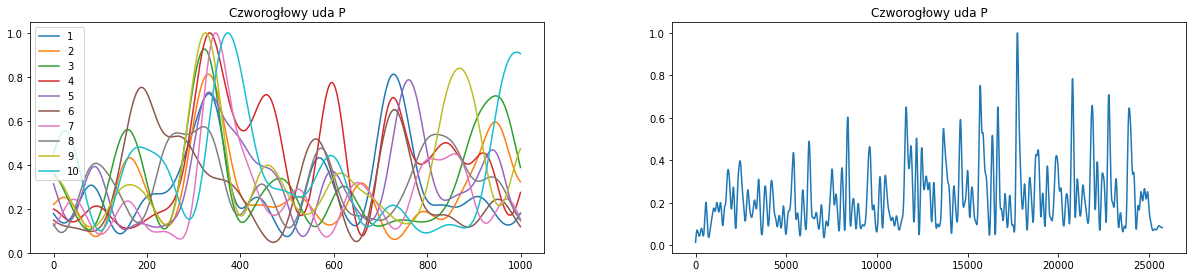

136 2321
-528 1537
571 2511
1326 3516
-444 1741
-548 1247
1262 3502
195 2210
564 2554
1299 3364


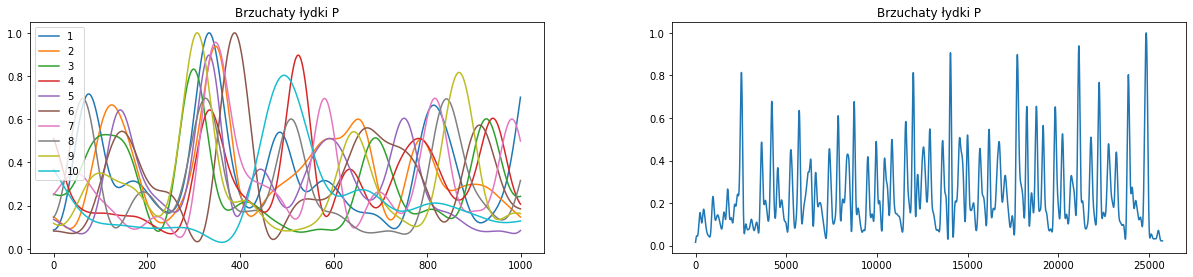

In [75]:
show_events_norm_shifted(datapath_fullmove)

In [12]:
def compare_events_average_shifted(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=dp.emg_full_preproces(file)
        
                
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        ev=[p,d]
        max_frame, frame_size=dp.find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
        for num in range(16):
          
            for i in range(len(p)):  
                
                s,k=dp.find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
                
                emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                #time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)                
                #time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000) 
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)
        file_num=file_num+1;
    for t2 in range(1000):
            aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
           
            
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()
        
        
        
        
        
        
        
        
        


In [26]:
def compare_events_average_shifted(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all_files=np.zeros((16,1000))
    aver_arr_one_file=np.zeros((16,1000))
    time=np.linspace(1,1000,1000)
    #print(time)
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=dp.emg_full_preproces(file)                               
        file_num=0

        p,d=dp.read_labels(file, 1000)
        ev=[p,d]
        max_frame, frame_size=dp.find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
        for num in range(16):
          
            for i in range(len(p)):  
                
                s,k=dp.find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
                
                emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                #time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)                
                #time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000) 
                for t in time:
                    aver_arr_one_file[num][int(t-1)]=aver_arr_one_file[num][int(t-1)]+time_normalized.values[int(t-1)]
                      
        file_num=file_num+1         
    for t in time:
        aver_arr_one_file[num][t]=aver_arr_one_file[num][t]/((len(p))*file_num )
        
        
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()
        


In [32]:
def compare_events_average_shifted(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr=np.zeros((6,16,1000))     
    time=np.linspace(1,1000,1000)
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=emg_full_preproces(file)
        
                
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=read_labels(file, 1000)
        ev=[p,d]
        for num in range(16):
            s,k=nowy_czas_analog(p,d,emg_processed[num])
          
            for i in range(len(p)):               
                emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)                
    
                for t in range(1000):
                    aver_arr[file_num][num][t]=aver_arr[file_num][num][t]+time_normalized.values[t]
        file_num=file_num+1;
        
    aver_arr_all=np.zeros((16,1000))    
    for plik in range(file_num): 
        for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]+aver_arr[plik][num][t]
    
    for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]/(10*(file_num+1))
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

In [57]:
def compare_events_average_shifted(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr=np.zeros((6,16,1000))     
    time=np.linspace(1,1000,1000)
    file_num=0
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=emg_full_preproces(file)
        
            
        

        p,d=read_labels(file, 1000)
        max_frame, frame_size=find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
        ev=[p,d]
        for num in range(16):
            
          
            for i in range(len(p)):     
                s,k=dp.find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
                emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)
                time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
                for t in range(1000):
                    aver_arr[file_num][num][t]=aver_arr[file_num][num][t]+time_normalized.values[t]
        file_num=file_num+1
        
    aver_arr_all=np.zeros((16,1000))    
    for plik in range(file_num): 
        for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]+aver_arr[plik][num][t]
    
    for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]/(10*(file_num))
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T01.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T02.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T03.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T04.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T05.c3d


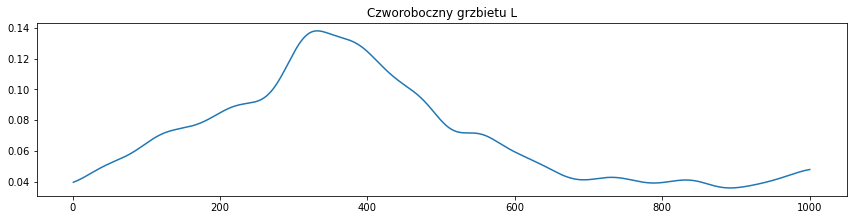

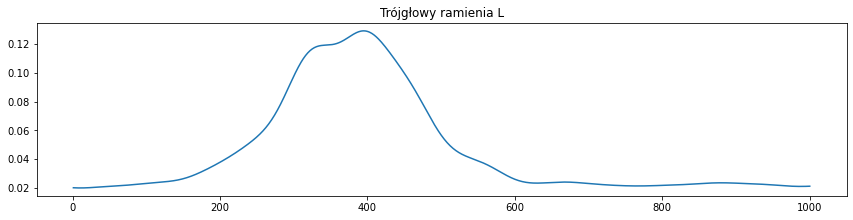

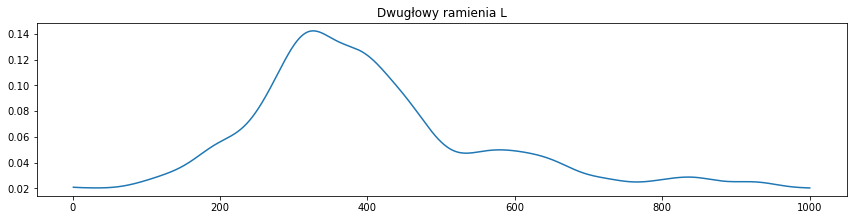

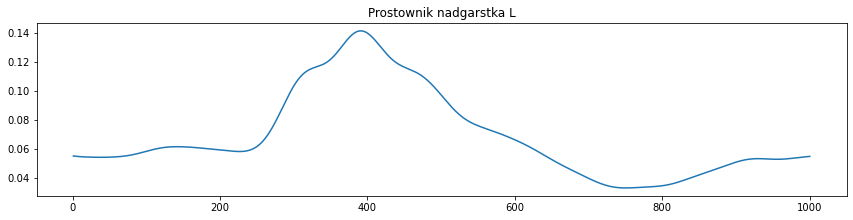

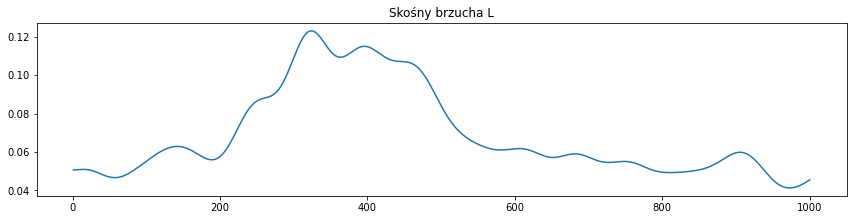

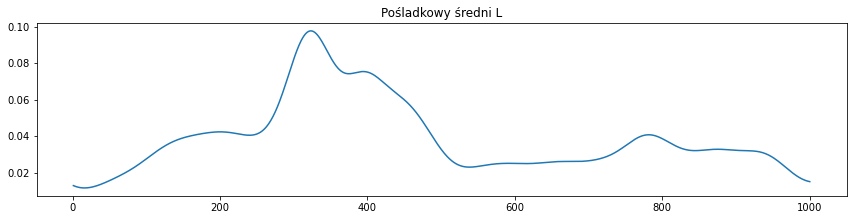

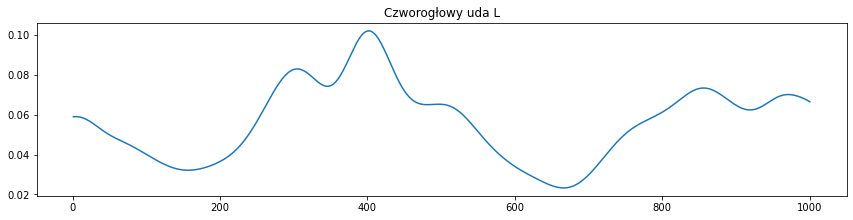

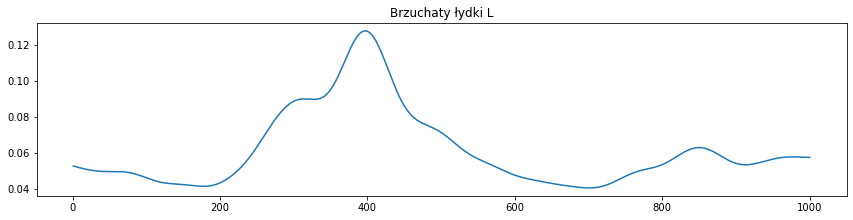

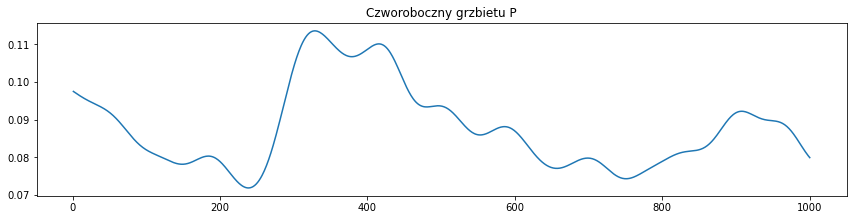

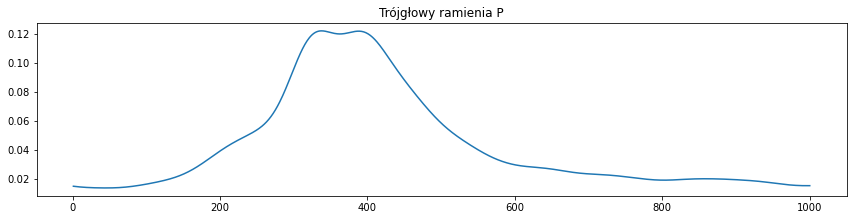

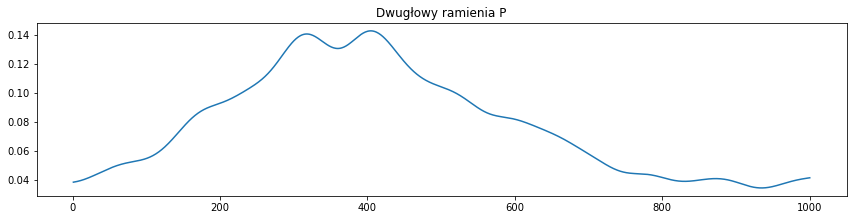

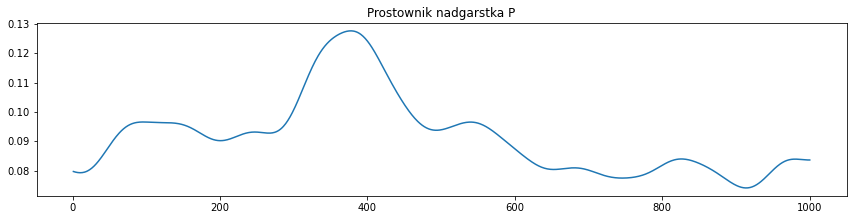

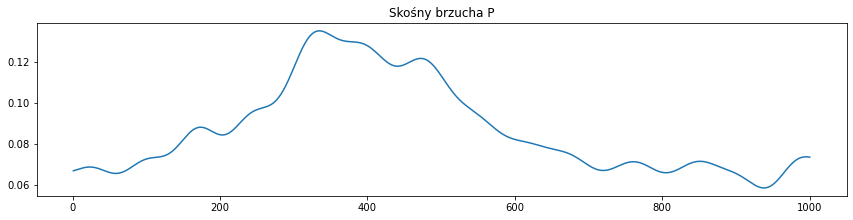

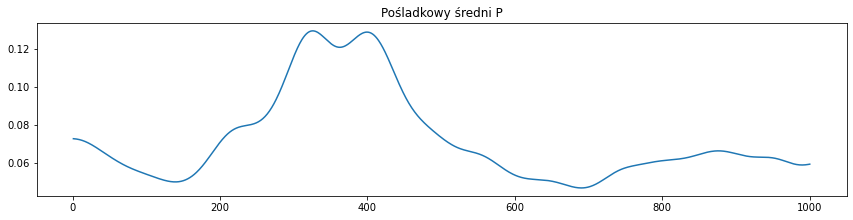

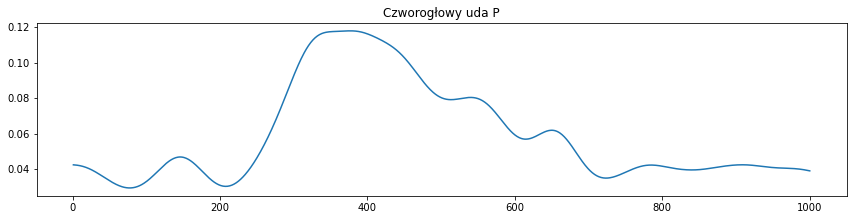

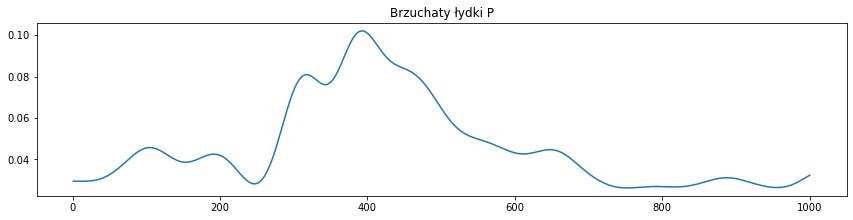

In [58]:
compare_events_average_shifted(folder_path,"B0446", "3")

In [61]:
def compare_events_average_shifted_new(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr=np.zeros((6,16,1000))     
    time=np.linspace(1,1000,1000)
    file_num=0
    
    
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=dp.emg_full_preproces(file)
        
            
        

        p,d=dp.read_labels(file, 1000)
        if (file_num==0):
            max_frame, frame_size=dp.find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
        ev=[p,d]
        for num in range(16):
            
          
            for i in range(len(p)):     
                s,k=dp.find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
                emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)
                time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
                for t in range(1000):
                    aver_arr[file_num][num][t]=aver_arr[file_num][num][t]+time_normalized.values[t]
        file_num=file_num+1
        
    aver_arr_all=np.zeros((16,1000))    
    for plik in range(file_num): 
        for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]+aver_arr[plik][num][t]
    
    for num in range(16):
            for t in range(1000):
                aver_arr_all[num][t]= aver_arr_all[num][t]/(10*(file_num))
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T01.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T02.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T03.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T04.c3d
Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E03-T05.c3d


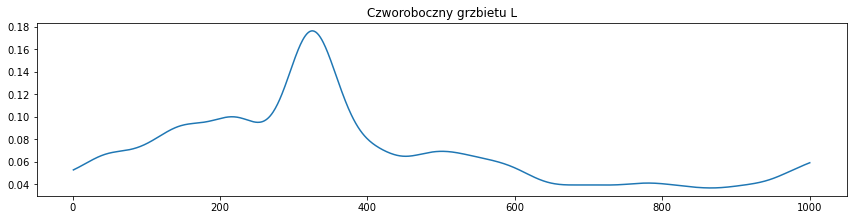

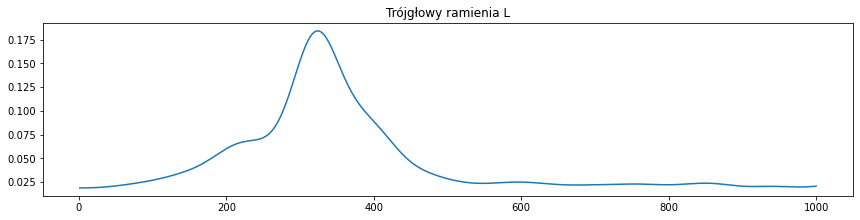

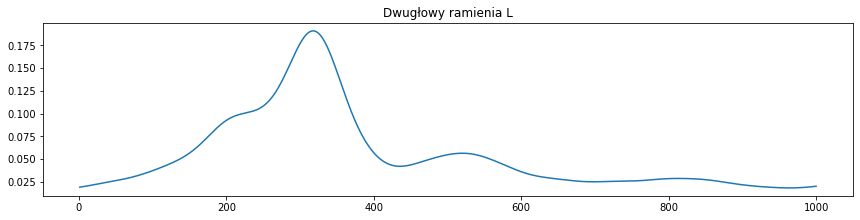

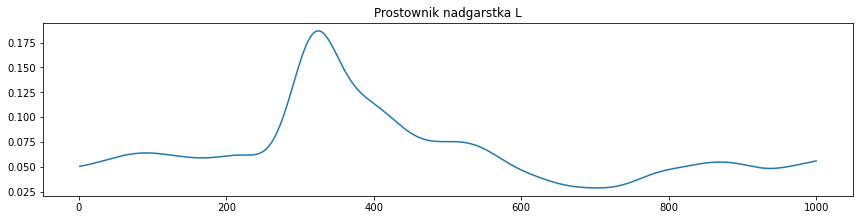

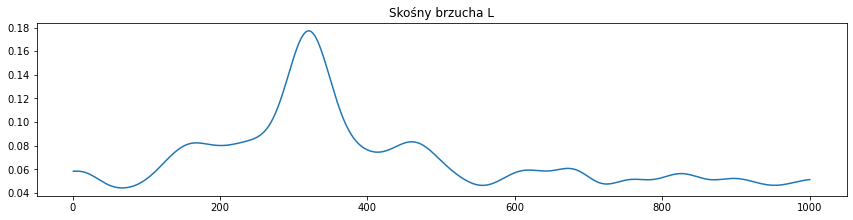

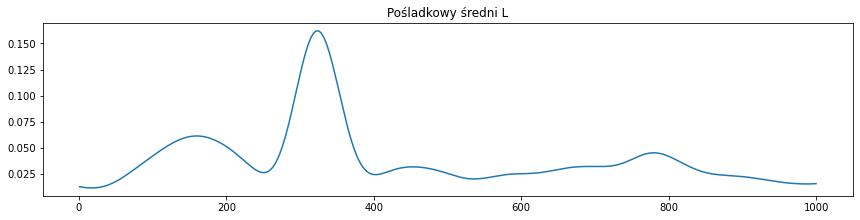

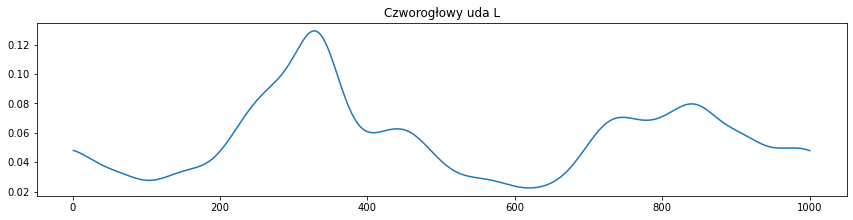

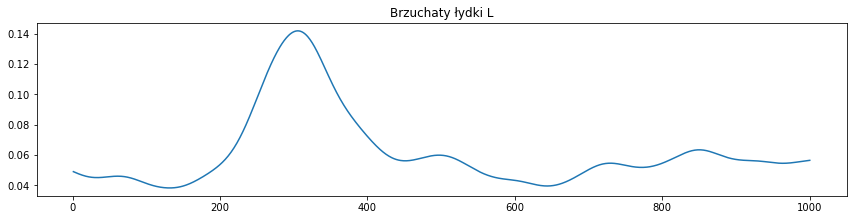

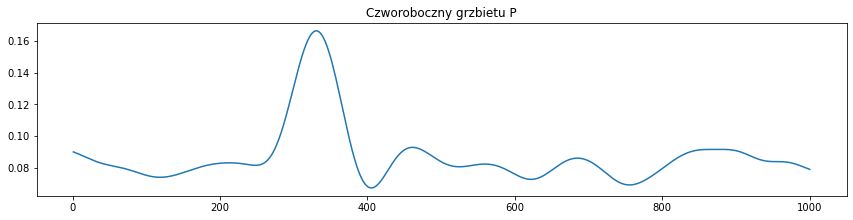

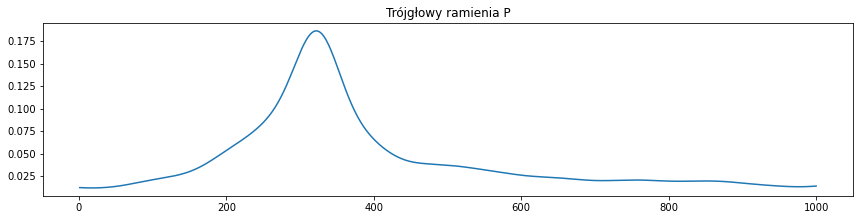

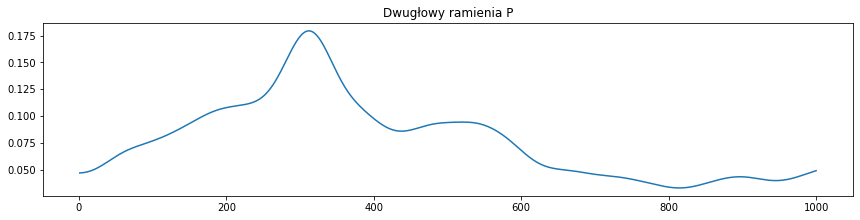

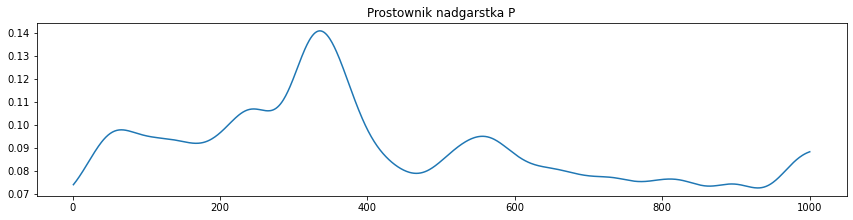

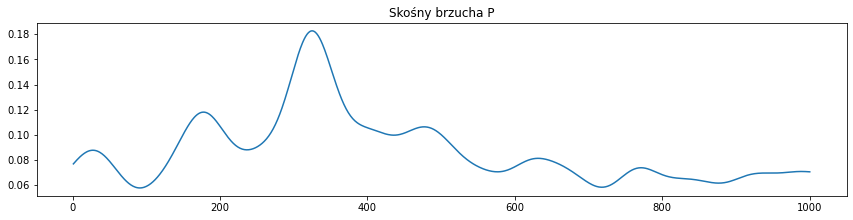

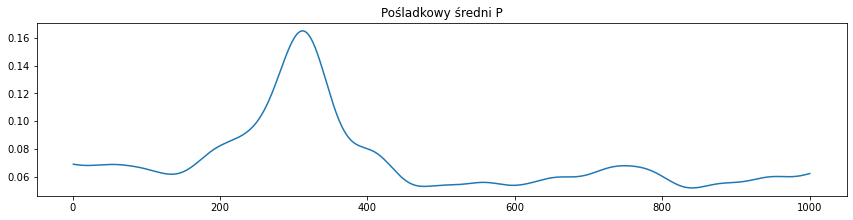

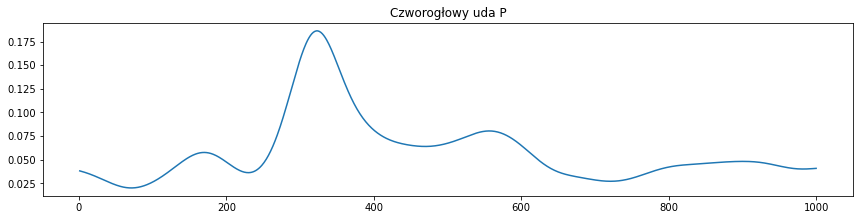

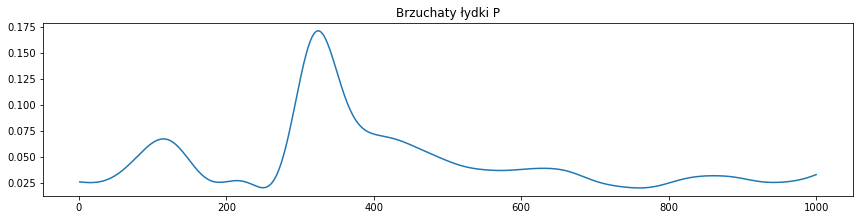

In [62]:
compare_events_average_shifted_new(folder_path,"B0446", "3")